# Steps to install Spacy


spaCy (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).

In this section we'll install and setup spaCy to work with Python, and then introduce some concepts related to Natural Language Processing.

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
> `conda install -c conda-forge spacy`
> <br>*or*<br>
> `pip install -U spacy`

> ### Alternatively you can create a virtual environment:
> `conda create -n spacyenv python=3 spacy=2`

### 2. Next, also from the command line (you must run this as admin or use sudo):

> `python -m spacy download en`

> ### If successful, you should see a message like:

> **`Linking successful`**<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_sm -->`<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en`<br>
> ` `<br>
> `    You can now load the model via spacy.load('en')`


# Working with spaCy in Python

This is a typical set of instructions for importing and working with spaCy. Don't be surprised if this takes awhile - spaCy has a fairly large library to load:

In [1]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj



1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')


___
## Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. We'll go into much more detail on tokenization in an upcoming lecture. For now, let's look at another example:

In [2]:
doc2 = nlp(u"We\'re moving to L.A.!")

for token in doc2:
    print(token.text, token.pos_)

We PRON
're AUX
moving VERB
to ADP
L.A. PROPN
! PUNCT


<img src="tokenization.png" width="600">

Notice how `We 're` has been split into two tokens. spaCy recognizes both the root verb `We` and the negation attached to it. 


___
## Part-of-Speech Tagging (POS)
After splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [3]:
doc2[0].pos_

'PRON'

___
## Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [4]:
# Lemmas (the base form of the word):
print(doc2[4].text)
print(doc2[4].lemma_)

L.A.
L.A.


In [5]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

PROPN
NNP / noun, proper singular


In [6]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

We: Xx
U.S. : X.X.


In [7]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
True


___
## Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [8]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [9]:
doc4[6].is_sent_start

True

# Named Entities
Going a step beyond tokens, *named entities* add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the `ents` property of a `Doc` object.

In [10]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Note how two tokens combine to form the entity `Hong Kong`, and three tokens combine to form the monetary entity:  `$6 million`</font>

## Visualizing the entity recognizer

In [11]:
from spacy import displacy

doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

# Lemmatization
lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [12]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

I 	 PRON 	 I
am 	 AUX 	 be
a 	 DET 	 a
runner 	 NOUN 	 runner
running 	 VERB 	 run
in 	 ADP 	 in
a 	 DET 	 a
race 	 NOUN 	 race
because 	 SCONJ 	 because
I 	 PRON 	 I
love 	 VERB 	 love
to 	 PART 	 to
run 	 VERB 	 run
since 	 SCONJ 	 since
I 	 PRON 	 I
ran 	 VERB 	 run
today 	 NOUN 	 today


# Feature Extraction 

To extract information, ML needs to extract features from Text. It cant be done by raw text, hence raw text is converted to Matrix or Vectors. 
Two ways do do that
1) Bag of Words
2) TF-IDF

# Bag Of Words

In [13]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are furry animals



Overwriting 1.txt


In [14]:
#creating a vocab
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [15]:
# Create an empty vector with space for each word in the vocabulary:
one = ['1.txt']+[0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
# map the frequencies of each word in 1.txt to our vector:
with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    one[vocab[word]]+=1
    
one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]

# TF-IDF Term Frequency - Inverse Document Frequency 

Purpose of TF -IDF is to identify only important words in document which might be not too frequent in every document.
TF stands for Term frequency - Which is found by getting how is frequqnce a term is on document. 
IDF is Inverse Document Frequency - It is calculated by finding occurence of that term in each document.



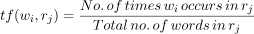

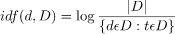

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [31]:
X = df['message']  # this time we want to look at the text

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)
X_tfidf.shape

(5572, 8713)

In [32]:
print(tfidf_vect.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [33]:
print(tfidf_vect.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}
